# Car Prices Prediction

### Step 1 : Reading and Understanding the Data

In [1]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#reading the dataset as a dataframe
cars_df = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
#printing the first 5 rows of the dataframe
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


We will now inspect the various aspects of the dataframe

In [5]:
#shape of the dataframe
cars_df.shape

(205, 26)

The dataframe has 205 entries and 26 variables which describes these entries

In [6]:
#performing a info on the dataframe
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

From the above information we can see that there are no missing values in the dataframe

In [7]:
#performing a describe method on the numerical variables of the data frame
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


We can notice a interesting fact from the above details, the mean and median are almost close to each other for all the numerical entries.

In [8]:
#printing the columns in our dataframe
cars_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [9]:
#replacing the '-' from the car name
cars_df['CarName'] = cars_df['CarName'].str.replace('-', ' ')

In [10]:
#since our analysis only requires the company name and not the model name of the car, we are removing the model name and keeping the company name
new = cars_df['CarName'].str.split(" ", n = 1, expand = True)
cars_df['car_company'] = new[0]

In [11]:
#displaying the first 5 rows of the dataframe
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,alfa romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa
1,2,3,alfa romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa
2,3,1,alfa romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [12]:
#dropping the carname column as we already have the car company column now for our analysis
cars_df.drop('CarName', axis = 1, inplace = True)

In [13]:
#displaying the first 5 rows of the dataframe
cars_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [14]:
#checking for the different car companies and number of entries for the same
cars_df['car_company'].value_counts()

toyota        31
nissan        17
mazda         15
honda         13
mitsubishi    13
subaru        12
peugeot       11
volvo         11
volkswagen     9
dodge          9
buick          8
bmw            8
audi           7
plymouth       7
saab           6
isuzu          4
porsche        4
alfa           3
chevrolet      3
jaguar         3
renault        2
vw             2
maxda          2
Nissan         1
porcshce       1
toyouta        1
mercury        1
vokswagen      1
Name: car_company, dtype: int64

from the above we can see that few of the car company names are not right. so replacing them with the right names

In [15]:
#lets convert all the car company names to lower case first
cars_df['car_company'] = cars_df['car_company'].str.lower()

#since we have some duplicate companies, lets fix them
cars_df['car_company'] = cars_df['car_company'].str.replace('vw', 'volkswagen')
cars_df['car_company'] = cars_df['car_company'].str.replace('vokswagen', 'volkswagen')
cars_df['car_company'] = cars_df['car_company'].str.replace('maxda', 'mazda')
cars_df['car_company'] = cars_df['car_company'].str.replace('toyouta', 'toyota')
cars_df['car_company'] = cars_df['car_company'].str.replace('porcshce', 'porsche')

In [16]:
#seeing the unique values now in car_company
cars_df['car_company'].unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

### Step 2: Visualizing the Data

**Visializing Numerical Variables**

Let us now make a pair plot of all the numerical variables

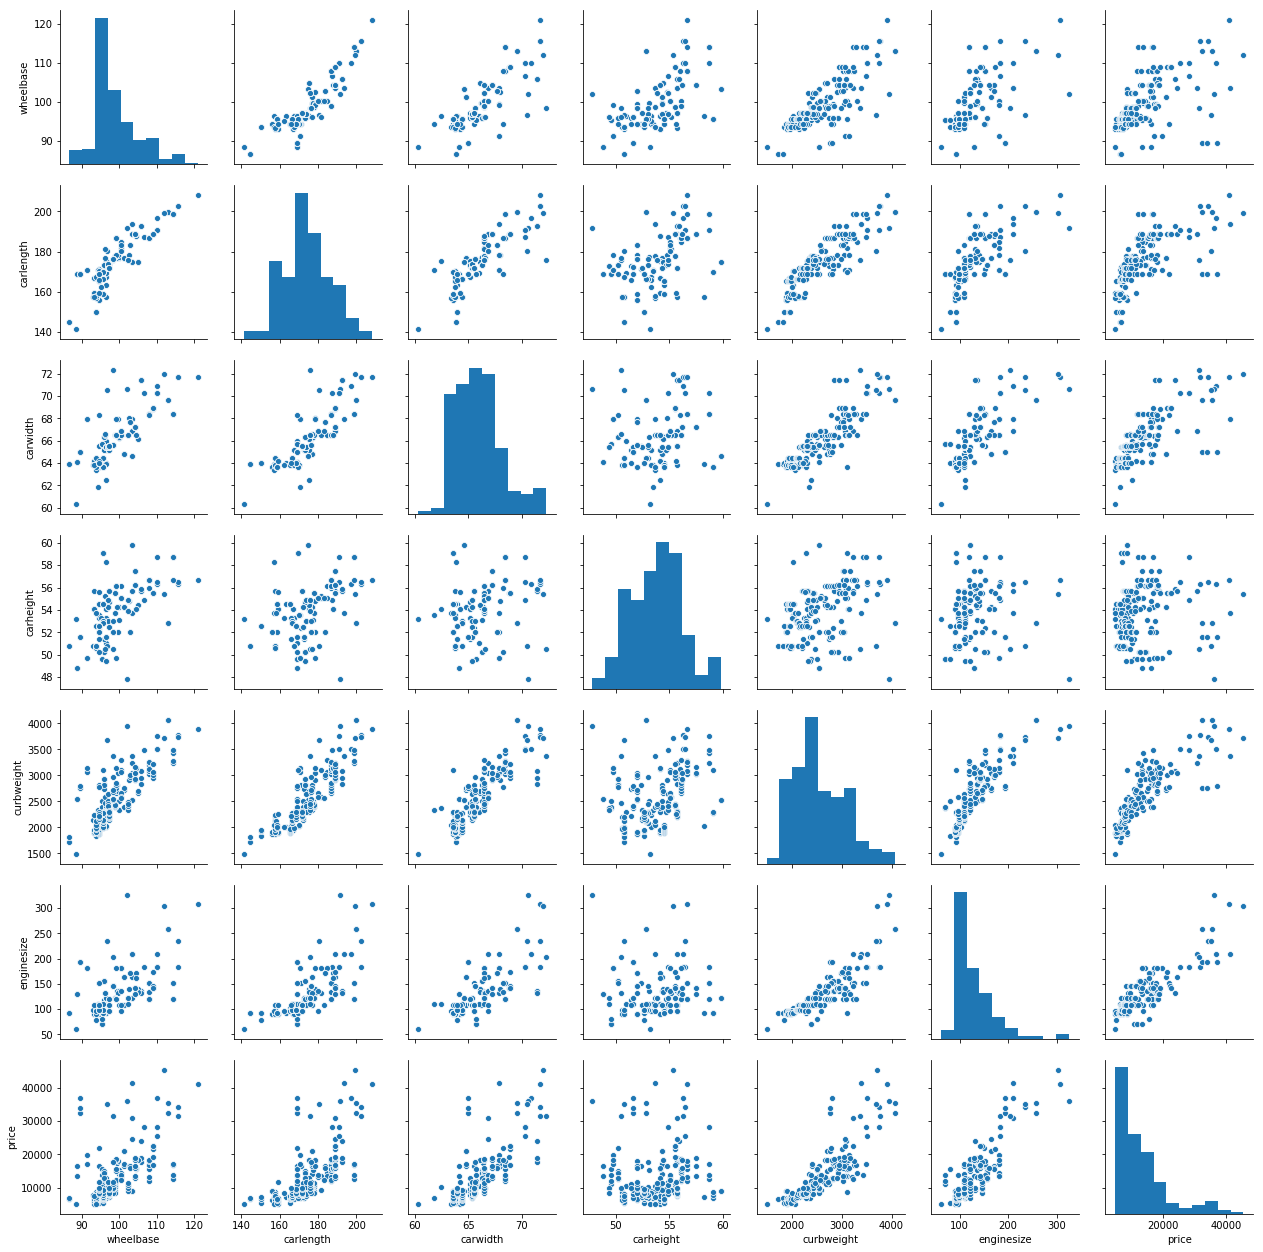

In [17]:
columns1 = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'price']
columns2 = ['boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
sns.pairplot(cars_df[columns1])
plt.show()

From the above plot we could observe the following:
1. Price has a correlation with the curb weight and engine size
2. Price has a correlation with other variables as well but its not that strong as the curb weight and engine size
3. We could also notice some of the variables are correlated with each other as well. This will have to be taken into account while choosing the variables for a our model.

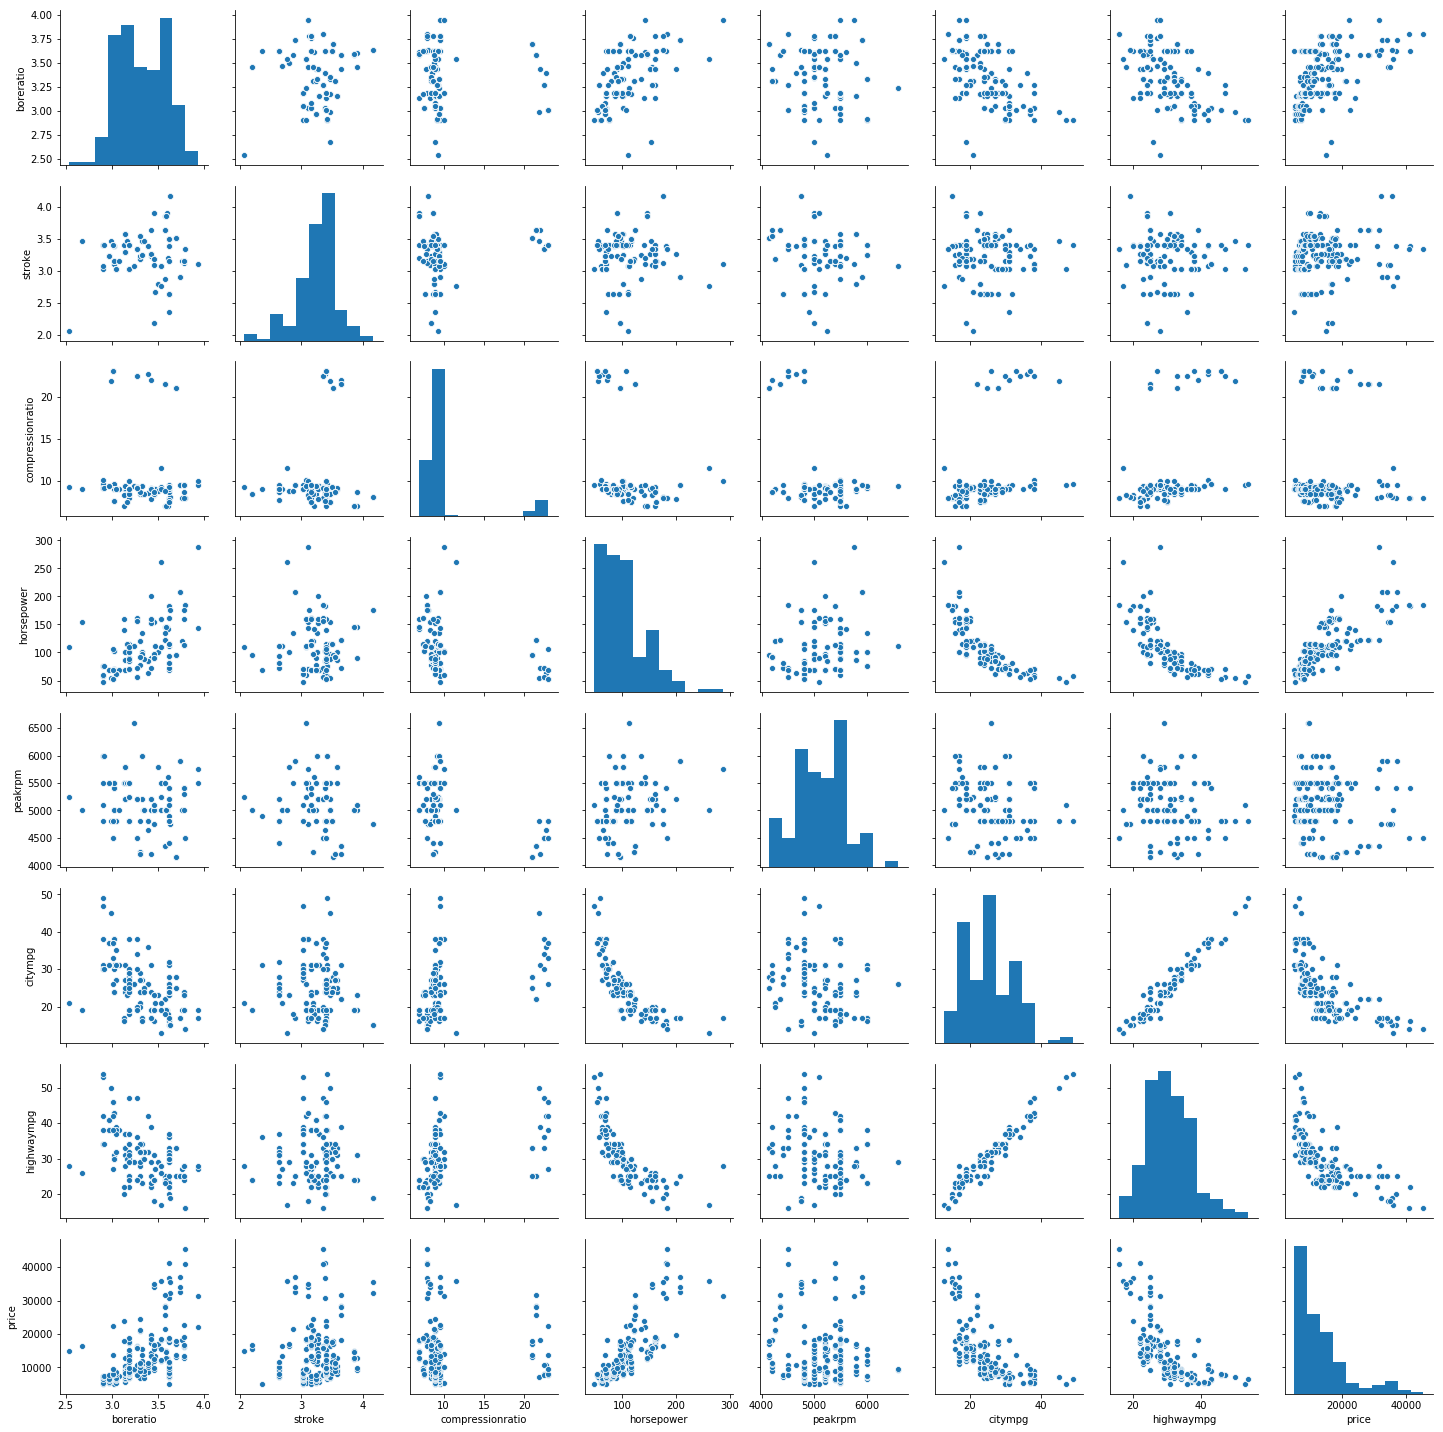

In [18]:
sns.pairplot(cars_df[columns2], palette = 'husl')
plt.show()

The above plot tells us that the following:
1. price looks correlated with the highwaympg and citympg.
2. Horse looks like having a negative correlation with the highway and city mpg.

In [19]:
#checking the number of unique values for all the categorical variables in our data set
cat_columns = ['symboling', 'car_company', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
               'enginetype', 'cylindernumber', 'fuelsystem']
cars_df[cat_columns].nunique().sort_values()

fueltype           2
aspiration         2
doornumber         2
enginelocation     2
drivewheel         3
carbody            5
symboling          6
enginetype         7
cylindernumber     7
fuelsystem         8
car_company       22
dtype: int64

From the above we can see that fueltype, aspiration and doornumber are binary categorical varibales in our dataset

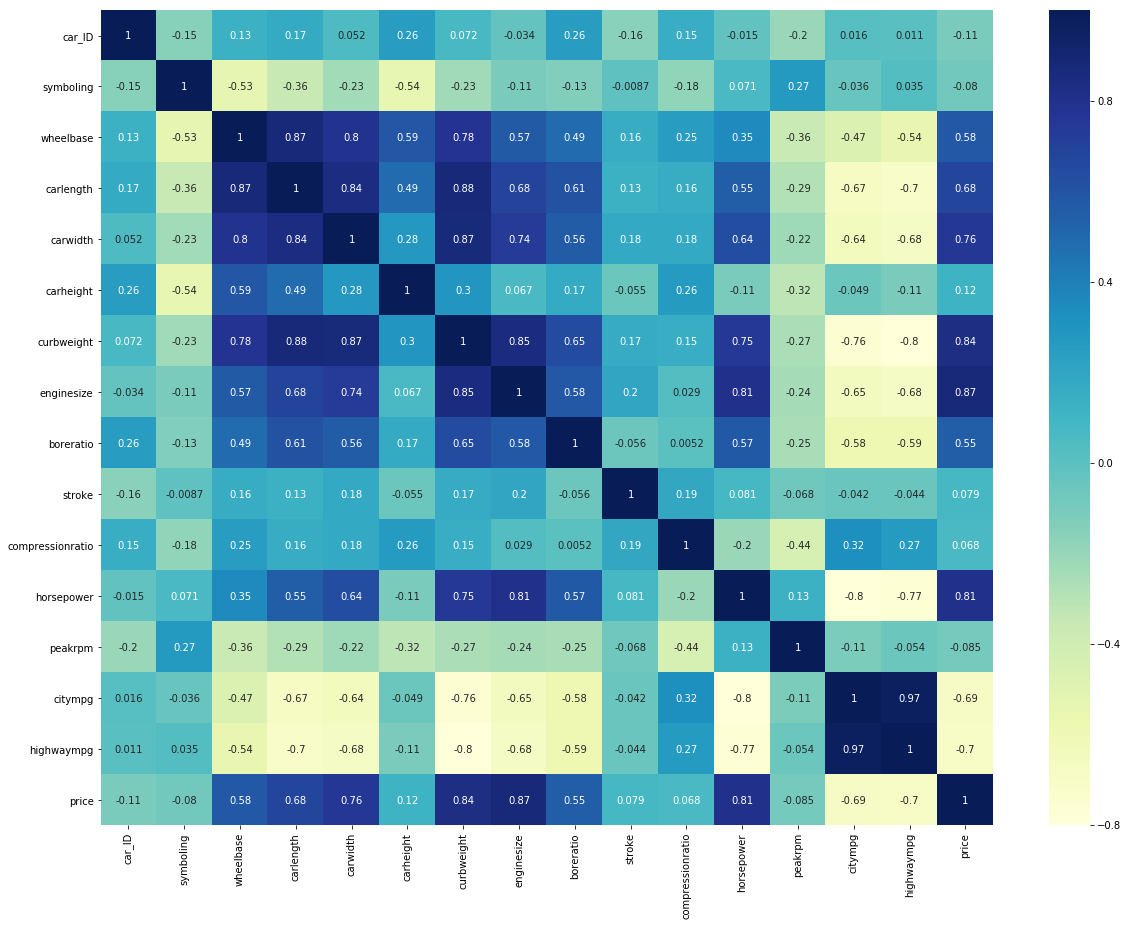

In [20]:
#lets now plot a heatmap to see the correlation between the numerical variables
plt.figure(figsize=(20,15))
sns.heatmap(cars_df.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

From the above correlation we can observe the following:
1. We can notice a high correlation between carlength and curbweight
2. Also between carwidth and wheelbase
3. There is a very high coorelation between citympg and highwaympg

Hence during our data preparation we will drop the following variables: curbweight, carwidth, wheelbase and highwaympg

**Visualizing Categorical Variables**

We have some categorical variables as well in our dataset, visualizing them using a box plot

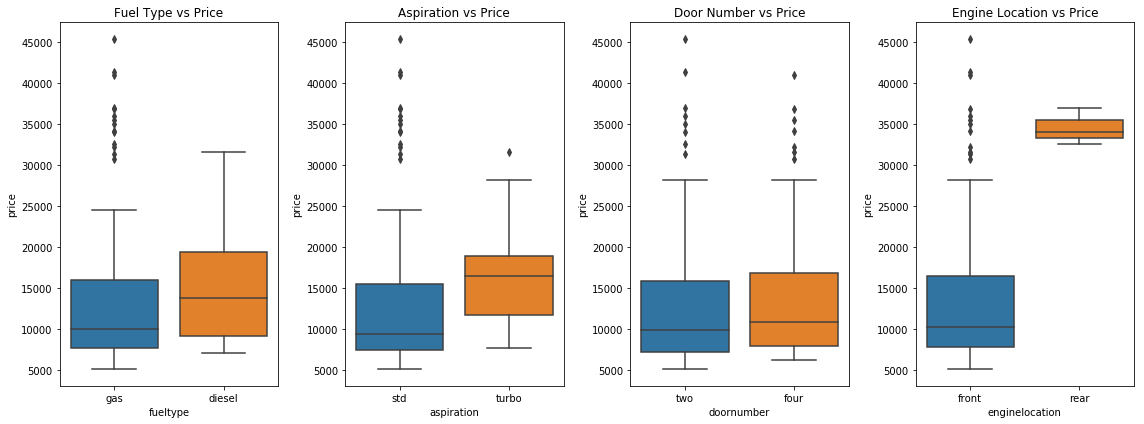

In [21]:
plt.figure(figsize=(16,6))
plt.subplot(1,4,1)
sns.boxplot(x = 'fueltype', y = 'price', data = cars_df)
plt.title('Fuel Type vs Price')
plt.subplot(1,4,2)
sns.boxplot(x = 'aspiration', y = 'price', data = cars_df)
plt.title('Aspiration vs Price')
plt.subplot(1,4,3)
sns.boxplot(x = 'doornumber', y = 'price', data = cars_df)
plt.title('Door Number vs Price')
plt.subplot(1,4,4)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars_df)
plt.title('Engine Location vs Price')
plt.tight_layout()
plt.show()

Following are the observations from the above plots:
1. Diesel cars tend to cost more than the gasoline ones
2. Turbo cars are costlier compared to the standard ones
3. Cars with 4 doors are a bit costlier than 2 doors but the difference is significantly less
4. It is interesting to note that cars with rear engine are costly

**Visualizing the remaining categorical variables**

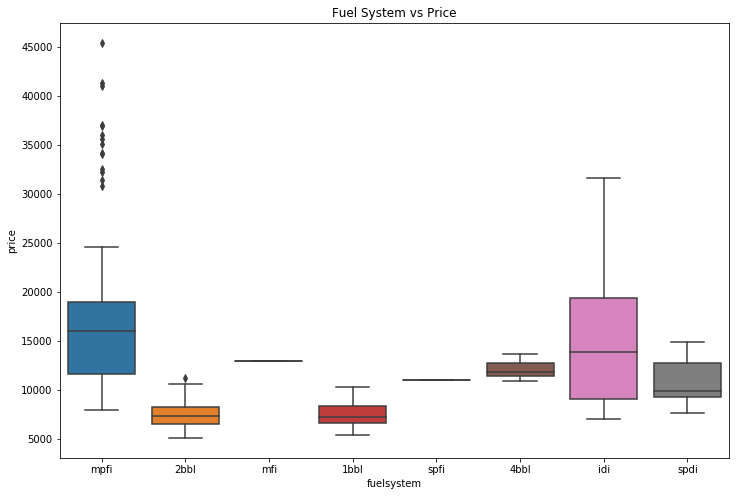

In [22]:
#fuel system vs price
plt.figure(figsize=(12,8))
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars_df)
plt.title("Fuel System vs Price")
plt.show()

We can see that the maximum spread of the price range is for the idi fuel system type

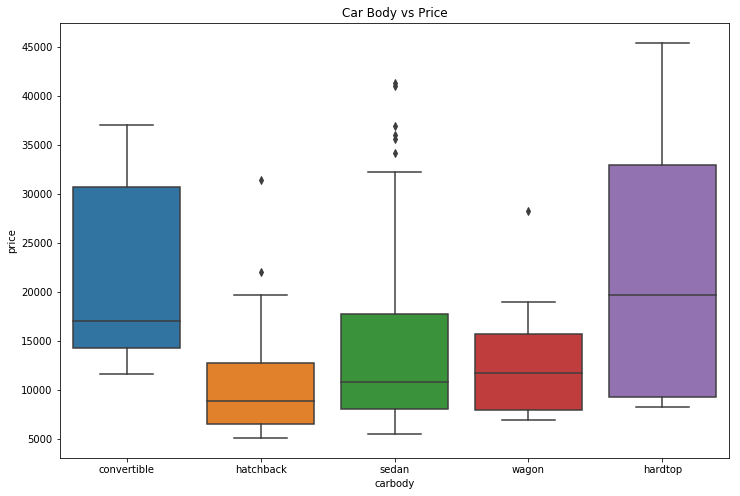

In [23]:
#let us now see how the carbody affects the price of the car
plt.figure(figsize=(12,8))
sns.boxplot(x = 'carbody', y = 'price', data = cars_df)
plt.title('Car Body vs Price')
plt.show()

From the above plot we can observer the following:
1. Hardtop car models have a maximum spread of the price followed by convertible.
2. Hatchback models tend to have cars beginning from lower price range followed by wagon and sedan.

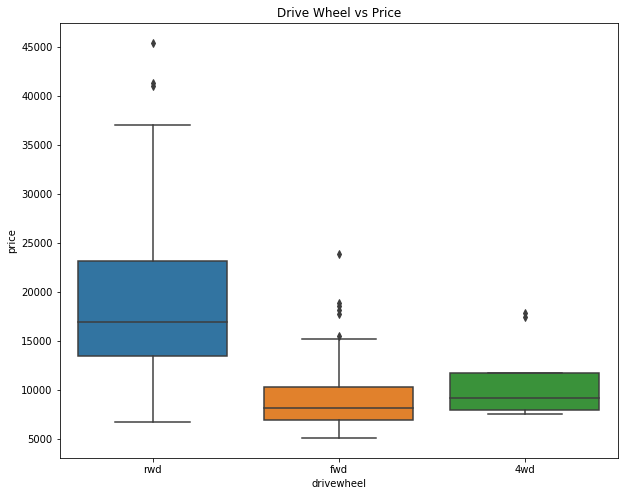

In [24]:
#drivewheel vs the price
plt.figure(figsize=(10,8))
sns.boxplot(x = 'drivewheel', y = 'price', data = cars_df)
plt.title('Drive Wheel vs Price')
plt.show()

We can see that the rear wheel drive cars are costlier compared to the forward wheel drive and 4 wheel drive cars.

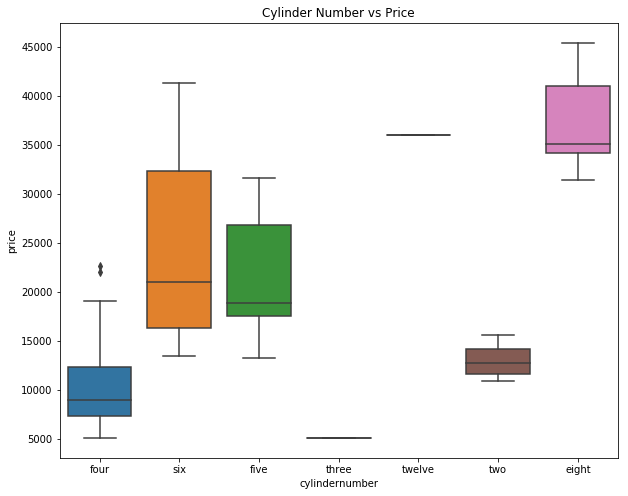

In [25]:
#cylindernumber vs price
plt.figure(figsize=(10,8))
sns.boxplot(x = 'cylindernumber', y = 'price', data = cars_df)
plt.title('Cylinder Number vs Price')
plt.show()

Fom the plot we can observe the following:
1. Cars with eight cylinders are tend to be costly
2. Cars with 6 cylinders have a maximum spread of the price followed by 3 cylinders.

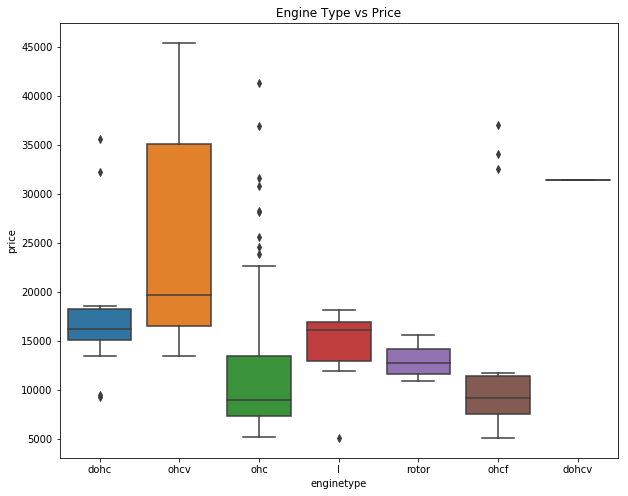

In [26]:
#enginetype vs price
plt.figure(figsize=(10,8))
sns.boxplot(x = 'enginetype', y = 'price', data = cars_df)
plt.title('Engine Type vs Price')
plt.show()

1. OHCV Engine Type has a maximum spread of the price
2. OHC and OHCF tend to lower prices compared to others

### Step 3: Data Preparation

In [27]:
#lets first drop the highly correlated variables from our dataset
cars_df.drop(['curbweight', 'carwidth', 'wheelbase', 'highwaympg'], axis = 1, inplace = True)

- we can see that many columns have binary values in our dataset.
- In order to fit a regression line, we would need them as numerical variables and not a string. Hence converting them to 0's and 1's

In [28]:
#find the unique values in the following 4 columns
print('Fuel Type: ',cars_df['fueltype'].unique())
print('Aspiration: ',cars_df['aspiration'].unique())
print('Door Number: ',cars_df['doornumber'].unique())
print('Engine Location: ',cars_df['enginelocation'].unique())

Fuel Type:  ['gas' 'diesel']
Aspiration:  ['std' 'turbo']
Door Number:  ['two' 'four']
Engine Location:  ['front' 'rear']


In [29]:
#mapping the the values in the above columns to 0's and 1.
cars_df['fueltype'] = cars_df['fueltype'].map({'gas' : 1, 'diesel' : 0})
cars_df['aspiration'] = cars_df['aspiration'].map({'std' : 1, 'turbo' : 0})
cars_df['doornumber'] = cars_df['doornumber'].map({'two' : 1, 'four' : 0})
cars_df['enginelocation'] = cars_df['enginelocation'].map({'front' : 1, 'rear' : 0})

In [30]:
#printing the first 5 rows of the dataframe
cars_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,car_company
0,1,3,1,1,1,convertible,rwd,1,168.8,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0,alfa
1,2,3,1,1,1,convertible,rwd,1,168.8,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0,alfa
2,3,1,1,1,1,hatchback,rwd,1,171.2,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0,alfa
3,4,2,1,1,0,sedan,fwd,1,176.6,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0,audi
4,5,2,1,1,0,sedan,4wd,1,176.6,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0,audi


**Dummy Variables**

We have few of the categorical variables which has many levels and these needs to converted to intergers as well.

Hence, for this we will use dummy variables

In [31]:
df = pd.get_dummies(cars_df)

In [32]:
#let us see how the data now looks like
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,3,1,1,1,1,168.8,48.8,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,2,3,1,1,1,1,168.8,48.8,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,1,1,171.2,52.4,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,4,2,1,1,0,1,176.6,54.3,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,5,2,1,1,0,1,176.6,54.3,136,3.19,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#doing an info on df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 68 columns):
car_ID                    205 non-null int64
symboling                 205 non-null int64
fueltype                  205 non-null int64
aspiration                205 non-null int64
doornumber                205 non-null int64
enginelocation            205 non-null int64
carlength                 205 non-null float64
carheight                 205 non-null float64
enginesize                205 non-null int64
boreratio                 205 non-null float64
stroke                    205 non-null float64
compressionratio          205 non-null float64
horsepower                205 non-null int64
peakrpm                   205 non-null int64
citympg                   205 non-null int64
price                     205 non-null float64
carbody_convertible       205 non-null uint8
carbody_hardtop           205 non-null uint8
carbody_hatchback         205 non-null uint8
carbody_sedan             20

We now have all the variables in the numerical format now

### Step 4 : Model Buiding & Evaluation

**Splitting the Data into Training and Testing Split**

In [34]:
#importing the required package to perform the train test split
from sklearn.model_selection import train_test_split

In [35]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [36]:
df_train.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
122,123,1,1,1,0,1,167.3,50.8,98,2.97,...,0,0,1,0,0,0,0,0,0,0
125,126,3,1,1,1,1,168.9,50.2,151,3.94,...,0,0,0,1,0,0,0,0,0,0
166,167,1,1,1,1,1,168.7,52.6,98,3.24,...,0,0,0,0,0,0,0,1,0,0
1,2,3,1,1,1,1,168.8,48.8,130,3.47,...,0,0,0,0,0,0,0,0,0,0
199,200,-1,1,0,0,1,188.8,57.5,130,3.62,...,0,0,0,0,0,0,0,0,0,1


**Rescaling the numerical variables using Min Max Scaler**

In [37]:
#importing the required libraries
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

In [39]:
#apply scaler to all the columns except the columns with 0's and 1 , and dummy variables
num_vars = ['symboling', 'carlength', 'carheight', 'enginesize', 'boreratio', 'stroke',
            'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [40]:
df_train.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
122,123,0.6,1,1,0,1,0.426016,0.265487,0.139623,0.230159,...,0,0,1,0,0,0,0,0,0,0
125,126,1.0,1,1,1,1,0.452033,0.212389,0.339623,1.000000,...,0,0,0,1,0,0,0,0,0,0
166,167,0.6,1,1,1,1,0.448780,0.424779,0.139623,0.444444,...,0,0,0,0,0,0,0,1,0,0
1,2,1.0,1,1,1,1,0.450407,0.088496,0.260377,0.626984,...,0,0,0,0,0,0,0,0,0,0
199,200,0.2,1,0,0,1,0.775610,0.858407,0.260377,0.746032,...,0,0,0,0,0,0,0,0,0,1


In [41]:
#lets do a describe on df_train
df_train.describe()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,98.524476,0.559441,0.909091,0.818182,0.440559,0.993007,0.525476,0.509004,0.241351,0.497946,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,58.977655,0.239200,0.288490,0.387050,0.498199,0.083624,0.204848,0.215378,0.154619,0.207140,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.500000,0.400000,1.000000,1.000000,0.000000,1.000000,0.399187,0.353982,0.135849,0.305556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,0.600000,1.000000,1.000000,0.000000,1.000000,0.502439,0.522124,0.184906,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,147.500000,0.600000,1.000000,1.000000,1.000000,1.000000,0.669919,0.668142,0.301887,0.682540,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,205.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Dividing into X and Y sets for the model building**

In [42]:
y_train = df_train.pop('price')
X_train = df_train

**RFE**

Let us now use RFE to extract the initial list of variables for our model building

In [43]:
#importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [44]:
#running RFE with the output number of variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15) #running RFE
rfe = rfe.fit(X_train, y_train)

In [45]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('car_ID', False, 49),
 ('symboling', False, 50),
 ('fueltype', False, 26),
 ('aspiration', False, 5),
 ('doornumber', False, 24),
 ('enginelocation', False, 47),
 ('carlength', True, 1),
 ('carheight', False, 16),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 42),
 ('horsepower', False, 32),
 ('peakrpm', False, 4),
 ('citympg', False, 48),
 ('carbody_convertible', False, 9),
 ('carbody_hardtop', False, 36),
 ('carbody_hatchback', False, 35),
 ('carbody_sedan', False, 34),
 ('carbody_wagon', False, 37),
 ('drivewheel_4wd', False, 45),
 ('drivewheel_fwd', False, 44),
 ('drivewheel_rwd', False, 25),
 ('enginetype_dohc', False, 8),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 3),
 ('enginetype_ohc', False, 13),
 ('enginetype_ohcf', False, 21),
 ('enginetype_ohcv', False, 7),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_eight', True, 1),
 ('cylindernumber_five', False, 12),
 ('cylindernumber_four', True, 1),
 ('cylin

In [46]:
col = X_train.columns[rfe.support_]
col

Index(['carlength', 'enginesize', 'boreratio', 'stroke', 'enginetype_dohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'car_company_audi', 'car_company_bmw', 'car_company_buick',
       'car_company_porsche'],
      dtype='object')

In [47]:
X_train.columns[~rfe.support_]

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'enginelocation', 'carheight', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'cylindernumber_five', 'cylindernumber_six', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'car_company_alfa', 'car_company_chevrolet',
       'car_company_dodge', 'car_company_honda', 'car_company_isuzu',
       'car_company_jaguar', 'car_company_mazda', 'car_company_mercury',
       'car_company_mitsubishi', 'car_company_nissan', 'car_company_peugeot',
       'car_company_plymouth', 'car_company_renault', 'car_company_saab',
   

**Building the Model Using Stats Model, for the deatiled statistis**

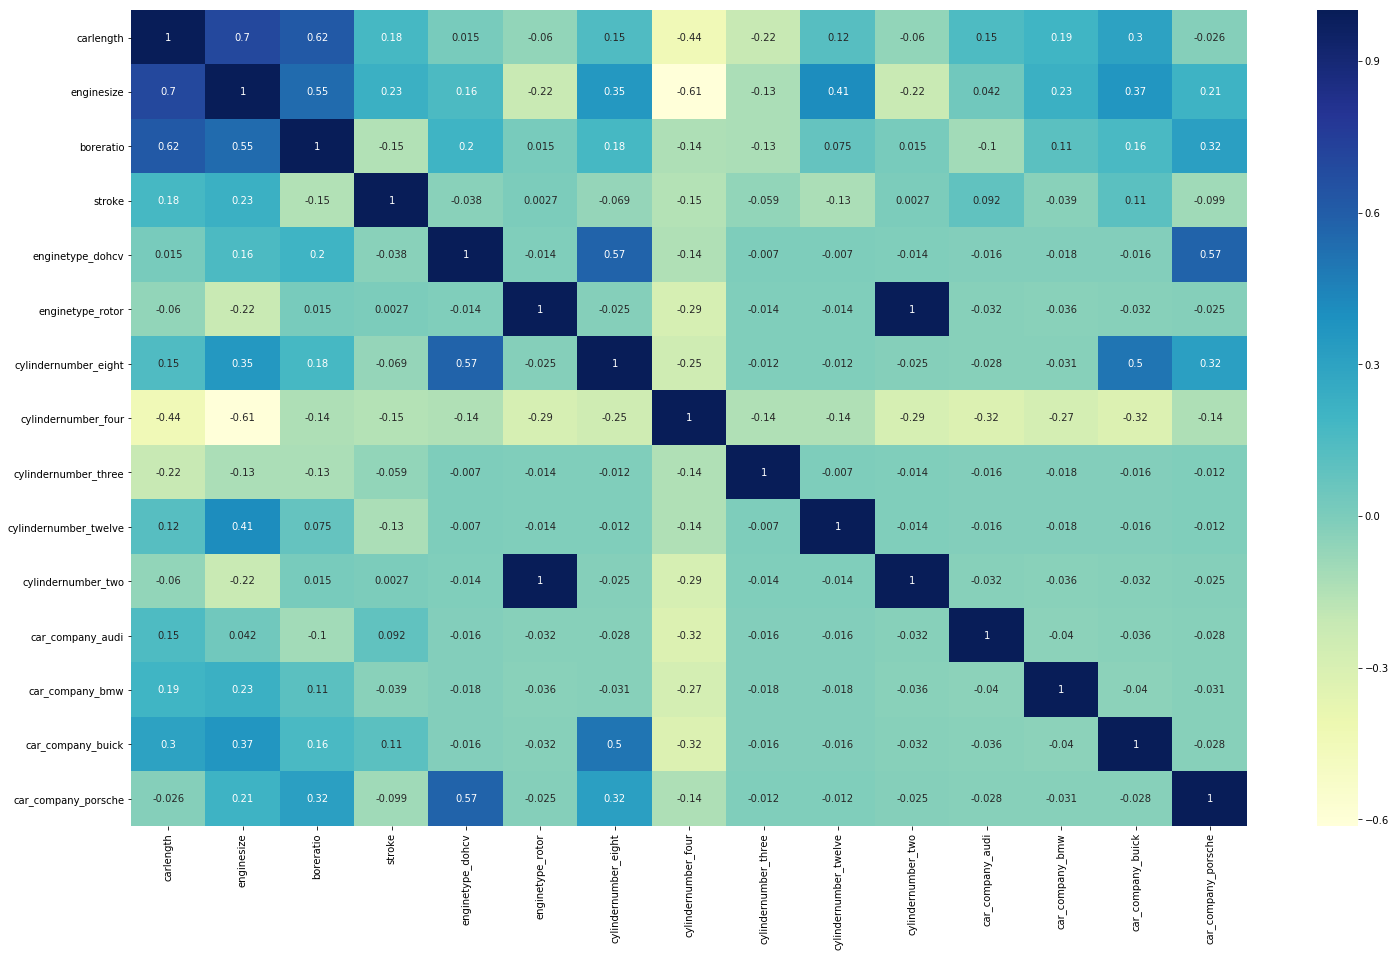

In [48]:
#lets now plot a heatmap to see the correlation between the selected variables
plt.figure(figsize=(25,15))
sns.heatmap(X_train[col].corr(), annot = True, cmap = 'YlGnBu')
plt.show()

In [49]:
#creating the X_train dataframe with RFE selected variables
X_train_lm = X_train[col]

In [50]:
#Adding a constant variable
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

In [51]:
lm_1 = sm.OLS(y_train, X_train_lm).fit() #running the linear model

In [52]:
#lets see the summary of our first linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     96.18
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           8.94e-61
Time:                        10:43:42   Log-Likelihood:                 191.70
No. Observations:                 143   AIC:                            -353.4
Df Residuals:                     128   BIC:                            -309.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

**Checking VIF**

In [53]:
#checking the VIF values for the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
X_train_lm.columns

Index(['const', 'carlength', 'enginesize', 'boreratio', 'stroke',
       'enginetype_dohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'car_company_audi', 'car_company_bmw',
       'car_company_buick', 'car_company_porsche'],
      dtype='object')

In [55]:
#defining a function for calculating the VIF's for the new model
def vif_cal(input_data):
    X_train_new = input_data.drop(['const'], axis = 1)
    vif = pd.DataFrame()
    X = X_train_new
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [56]:
#vif values after the first model
vif_cal(X_train_lm)

,Features,VIF
5,enginetype_rotor,inf
10,cylindernumber_two,inf
1,enginesize,78.52
2,boreratio,47.79
3,stroke,41.59
7,cylindernumber_four,28.62
0,carlength,24.85
6,cylindernumber_eight,4.56
9,cylindernumber_twelve,3.61
4,enginetype_dohcv,3.18


We will drop the variable enginetype_rotor for our analysis since it is highly correlated with cylindernumber_two as well.

In [57]:
#let us drop the variable enginetye_rotor with the high VIF value for the next model
X = X_train_lm.drop(['enginetype_rotor', 'const'], axis = 1)

In [58]:
#let us now build a second model
X_train_lm = sm.add_constant(X)
lm_2 = sm.OLS(y_train, X_train_lm).fit()

In [59]:
#printing the summary of the model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     96.18
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           8.94e-61
Time:                        10:43:42   Log-Likelihood:                 191.70
No. Observations:                 143   AIC:                            -353.4
Df Residuals:                     128   BIC:                            -309.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

From the P value point of view , the variables look significant except for enginetype_dohcv where the p value is 0.064. Lets drop this variable for the next model.

In [60]:
#vif values after the second model
vif_cal(X_train_lm)

,Features,VIF
1,enginesize,78.52
2,boreratio,47.79
3,stroke,41.59
6,cylindernumber_four,28.62
0,carlength,24.85
5,cylindernumber_eight,4.56
9,cylindernumber_two,4.27
8,cylindernumber_twelve,3.61
4,enginetype_dohcv,3.18
12,car_company_buick,2.29


In [61]:
#let us drop the variable enginetype_dohc with the high p value for the next model
X = X_train_lm.drop(['enginetype_dohcv', 'const'], axis = 1)

In [62]:
#let us now build a third model
X_train_lm = sm.add_constant(X)
lm_3 = sm.OLS(y_train, X_train_lm).fit()

In [63]:
#printing the summary of the model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.4
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           4.78e-61
Time:                        10:43:42   Log-Likelihood:                 189.78
No. Observations:                 143   AIC:                            -351.6
Df Residuals:                     129   BIC:                            -310.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

We can see that now the cylindernumber_eight is insignificant also it is negavtively correlated with the stroke. Hence lets drop this variable now.

In [64]:
#Again calculating the VIF values
vif_cal(X_train_lm)

,Features,VIF
1,enginesize,59.00
2,boreratio,38.69
3,stroke,31.82
0,carlength,24.68
5,cylindernumber_four,21.38
8,cylindernumber_two,3.40
7,cylindernumber_twelve,2.99
4,cylindernumber_eight,2.18
11,car_company_buick,1.77
12,car_company_porsche,1.64


In [65]:
#let us drop the variable cylindernumber_eight with the high p value for the next model
X = X_train_lm.drop(['cylindernumber_eight', 'const'], axis = 1)

In [66]:
#let us now build a fourth model
X_train_lm = sm.add_constant(X)
lm_4 = sm.OLS(y_train, X_train_lm).fit()

In [67]:
#printing the summary of the model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     107.5
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           2.37e-61
Time:                        10:43:42   Log-Likelihood:                 187.92
No. Observations:                 143   AIC:                            -349.8
Df Residuals:                     130   BIC:                            -311.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

All the variables now look significant from the p value point of view. Lets check the vif values

In [68]:
#Again calculating the VIF values
vif_cal(X_train_lm)

,Features,VIF
1,enginesize,43.84
2,boreratio,32.75
3,stroke,25.15
0,carlength,24.50
4,cylindernumber_four,17.14
7,cylindernumber_two,2.82
6,cylindernumber_twelve,2.48
8,car_company_audi,1.45
11,car_company_porsche,1.45
10,car_company_buick,1.38


Let us drop the variable cylindernumber_four since it hight pvalue compared to others and also the VIF value is above 10

In [69]:
#let us drop the variable cylindernumber_four with the high VIF value for the next model
X = X_train_lm.drop(['cylindernumber_four', 'const'], axis = 1)

In [70]:
#let us now build a fifth model
X_train_lm = sm.add_constant(X)
lm_5 = sm.OLS(y_train, X_train_lm).fit()

In [71]:
#printing the summary of the model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     112.8
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           3.44e-61
Time:                        10:43:42   Log-Likelihood:                 184.86
No. Observations:                 143   AIC:                            -345.7
Df Residuals:                     131   BIC:                            -310.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

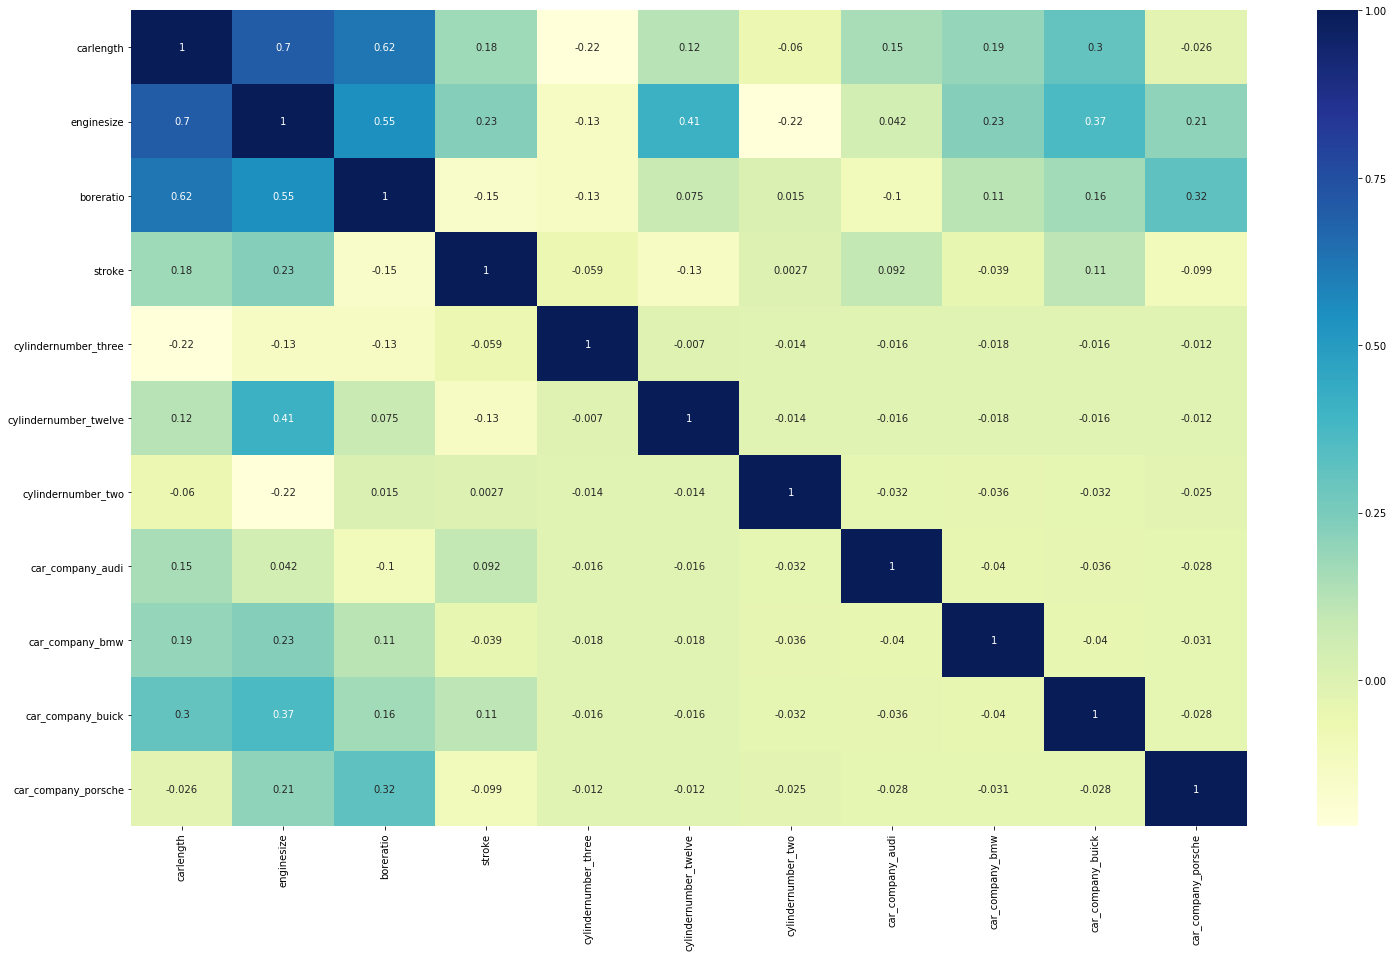

In [72]:
#printing the correlation matrix again
X = X_train_lm.drop(['const'], axis = 1)
plt.figure(figsize=(25,15))
sns.heatmap(X.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

In [73]:
#also checking for the vif values
vif_cal(X_train_lm)

,Features,VIF
0,carlength,24.44
1,enginesize,14.05
2,boreratio,13.65
3,stroke,7.09
5,cylindernumber_twelve,1.64
10,car_company_porsche,1.44
9,car_company_buick,1.37
8,car_company_bmw,1.23
6,cylindernumber_two,1.18
7,car_company_audi,1.17


From the above summary and correlation plot we can see that cylindernumber_twelve has a high p value and its correlated with car_company variables, hence we will remove this for our analysis.

In [74]:
#let us drop the variable cylindernumber_eight with the high p value for the next model
X = X_train_lm.drop(['cylindernumber_twelve'], axis = 1)

In [75]:
#let us now build a sixth model
X_train_lm = sm.add_constant(X)
lm_6 = sm.OLS(y_train, X_train_lm).fit()

In [76]:
#printing the summary of the model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     122.8
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           8.52e-62
Time:                        10:43:43   Log-Likelihood:                 183.72
No. Observations:                 143   AIC:                            -345.4
Df Residuals:                     132   BIC:                            -312.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0935 

In [77]:
#also let us check for the VIF values as well
vif_cal(X_train_lm)

,Features,VIF
0,carlength,24.02
2,boreratio,13.50
1,enginesize,9.07
3,stroke,6.47
9,car_company_porsche,1.37
8,car_company_buick,1.26
6,car_company_audi,1.17
7,car_company_bmw,1.16
5,cylindernumber_two,1.13
4,cylindernumber_three,1.04


Lets drop the stroke variable since it has a high negative correlation with the bore ratio and also has a high pvalue

In [78]:
#let us drop the variable stroke with the high p value for the next model
X = X_train_lm.drop(['stroke', 'const'], axis = 1)

In [79]:
#let us now build a seventh model
X_train_lm = sm.add_constant(X)
lm_7 = sm.OLS(y_train, X_train_lm).fit()

In [80]:
#printing the summary of the model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     135.5
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           1.71e-62
Time:                        10:43:43   Log-Likelihood:                 182.76
No. Observations:                 143   AIC:                            -345.5
Df Residuals:                     133   BIC:                            -315.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1232 

In [81]:
#lets now see the changes to the vif values
vif_cal(X_train_lm)

,Features,VIF
0,carlength,19.43
2,boreratio,13.50
1,enginesize,8.97
8,car_company_porsche,1.37
7,car_company_buick,1.22
5,car_company_audi,1.17
6,car_company_bmw,1.13
4,cylindernumber_two,1.12
3,cylindernumber_three,1.01


Lets remove the boreratio from our analysis since its highly correlated with the carlength and engine size

In [82]:
#let us drop the variable boreratio with the high VIF value for the next model
X = X_train_lm.drop(['boreratio', 'const'], axis = 1)

In [83]:
#let us now build a eighth model
X_train_lm = sm.add_constant(X)
lm_8 = sm.OLS(y_train, X_train_lm).fit()

In [84]:
#printing the summary of the model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     151.1
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           3.47e-63
Time:                        10:43:43   Log-Likelihood:                 181.74
No. Observations:                 143   AIC:                            -345.5
Df Residuals:                     134   BIC:                            -318.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1310 

In [85]:
#lets now see the changes to the vif values
vif_cal(X_train_lm)

,Features,VIF
1,enginesize,8.93
0,carlength,8.20
6,car_company_buick,1.20
7,car_company_porsche,1.15
5,car_company_bmw,1.13
3,cylindernumber_two,1.10
4,car_company_audi,1.07
2,cylindernumber_three,1.00


Lets remove cylindernumber_three as this looks to be insignificant for our analysis

In [86]:
#let us drop the variable cylindernumber_three with the high VIF value for the next model
X = X_train_lm.drop(['cylindernumber_three', 'const'], axis = 1)

In [87]:
#let us now build a ninth model
X_train_lm = sm.add_constant(X)
lm_9 = sm.OLS(y_train, X_train_lm).fit()

In [88]:
#printing the summary of the model
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     169.3
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           1.32e-63
Time:                        10:43:43   Log-Likelihood:                 179.98
No. Observations:                 143   AIC:                            -344.0
Df Residuals:                     135   BIC:                            -320.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1233    

All the variables look significant now, hence we will take lm_9 as our final model.

**Residual Analysis for the Train Data**

In [89]:
y_train_price = lm_9.predict(X_train_lm)

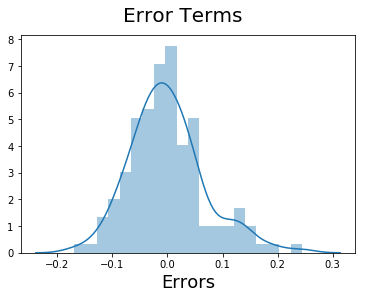

In [90]:
#lets now plot a histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

From the above plot we can see that the error terms are normally distributed with mean of 0

**Making Predictions Using the Final Model**

***Applying Scaling on the Test Set***

In [91]:
num_vars = ['symboling', 'carlength', 'carheight', 'enginesize', 'boreratio', 'stroke',
            'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [92]:
df_test.describe()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,113.322581,0.583871,0.887097,0.822581,0.435484,0.967742,0.559481,0.559663,0.265673,0.556580,...,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645
std,59.300782,0.271724,0.319058,0.385142,0.499868,0.178127,0.189947,0.215811,0.162820,0.228484,...,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.141593,0.067925,-0.111111,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.400000,1.000000,1.000000,0.000000,1.000000,0.459350,0.384956,0.177358,0.404762,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,117.500000,0.600000,1.000000,1.000000,0.000000,1.000000,0.547967,0.588496,0.226415,0.563492,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,167.500000,0.800000,1.000000,1.000000,1.000000,1.000000,0.719919,0.699115,0.316038,0.746032,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,202.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.089431,1.061947,0.932075,0.888889,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


**Dividing into X_test and y_test**

In [93]:
y_test = df_test.pop('price')
X_test = df_test

In [94]:
X_train_new = X_train_lm.drop(['const'], axis = 1)
X_train_new.columns

Index(['carlength', 'enginesize', 'cylindernumber_two', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 'car_company_porsche'],
      dtype='object')

In [95]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

In [96]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [97]:
# Making predictions
y_pred = lm_9.predict(X_test_new)

**Model Evaluation**

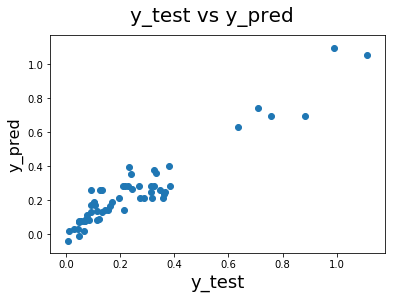

In [98]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

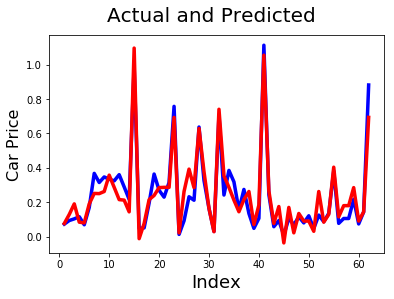

In [99]:
#Actualvs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)
plt.show()

**RMSE ans r2_score**

In [100]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Looking at the RMSE

In [101]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.07254911461186324

Checking the R-sqaured on the test set

In [102]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9015238942496364

Following are the Conclusions from our Model:
1. The R square and Adjusted R square value  almost same which is 89.8% and 89.2% respectively which indicates that none of the parameters in the model are redundant. Also the R square for the predicted set is 90.15% which is very close to our trained model.

2. We can see that the error terms are normally distributed with a mean of 0.

3. The RSME value is 0.07254911461186324